In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import datetime
import os

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
filename = "../data/Alcohol_Sales.csv"
img_path = '../plots/forecasting/'

In [3]:
df_sales = pd.read_csv(filename, parse_dates=['DATE'])
display(df_sales.head)
display(df_sales.describe())

<bound method NDFrame.head of           DATE  S4248SM144NCEN
0   1992-01-01            3459
1   1992-02-01            3458
2   1992-03-01            4002
3   1992-04-01            4564
4   1992-05-01            4221
..         ...             ...
320 2018-09-01           12396
321 2018-10-01           13914
322 2018-11-01           14174
323 2018-12-01           15504
324 2019-01-01           10718

[325 rows x 2 columns]>

,S4248SM144NCEN
count,325.000000
mean,7886.400000
std,2914.269061
min,3031.000000
25%,5231.000000
50%,7481.000000
75%,9977.000000
max,15504.000000


In [4]:

df_sales.index = df_sales['DATE']
df_sales = df_sales.drop(['DATE'], axis=1)
df_sales.index = df_sales.index.rename('time')
display(df_sales)
display(df_sales.describe())
df_sales = df_sales.rename(columns={"S4248SM144NCEN": "Sales"})
sales_title = df_sales.columns[0]
df_sales.isna().sum()

,S4248SM144NCEN
time,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221
...,...
2018-09-01,12396
2018-10-01,13914
2018-11-01,14174


,S4248SM144NCEN
count,325.000000
mean,7886.400000
std,2914.269061
min,3031.000000
25%,5231.000000
50%,7481.000000
75%,9977.000000
max,15504.000000


Sales    0
dtype: int64

In [5]:
df_sales_ml = df_sales.copy()

In [6]:
# Useful functions

def get_test_train_split(df, split=0.2):
    split_nb = int(len(df)*split)
    train, test = df.iloc[:-split_nb], df.iloc[-split_nb:]
    train.index = pd.to_datetime(train.index)
    test.index = pd.to_datetime(test.index)
    return train, test

def base_model(df):
    """Predict a  with previous observation"""
    data = df.values
    pred_data = np.roll(data, shift=1, axis=None)
    pred_data[0] = data[0]
    
    return pred_data

def model_evaluation(true_val, pred_val):
    """Get the Root Mean Square Error and Mean Absolute Error"""
    rmse = np.sqrt(mean_squared_error(true_val, pred_val))
    mae = mean_absolute_error(true_val, pred_val)
    return rmse, mae

In [7]:
train,test = get_test_train_split(df_sales_ml, 0.2)

In [8]:
display(train.head)

<bound method NDFrame.head of             Sales
time             
1992-01-01   3459
1992-02-01   3458
1992-03-01   4002
1992-04-01   4564
1992-05-01   4221
...           ...
2013-04-01  10493
2013-05-01  12218
2013-06-01  11385
2013-07-01  11186
2013-08-01  11462

[260 rows x 1 columns]>

In [9]:

pred_train_base = base_model(train)
pred_test_base = base_model(test)
base_rmse_train, base_mae_train = model_evaluation(train['Sales'], pred_train_base)
base_rmse_test, base_mae_test = model_evaluation(test['Sales'], pred_test_base)
#print("Base model, rmse Train Error: ", base_rmse_train) 
#print("Base model, rmse Test Error: ", base_rmse_test) 


print('Train data')
print('Base model RMSE: ', base_rmse_train) # RMSE
print('Base model MAE: ', base_mae_train)  # MAE


print('\n')
print('Test data')
print('Base model RMSE: ', base_rmse_test) 
print('Base model MAE: ', base_mae_test)


Train data
Base model RMSE:  1088.2289086825012
Base model MAE:  756.1884615384615


Test data
Base model RMSE:  1999.1991781326226
Base model MAE:  1513.5692307692307


# Machine Learning models

In [10]:
train_test = df_sales_ml.copy()
train_test.head()

,Sales
time,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [11]:
# Create lag Features

def create_lags(df, n, col = 'Sales'):
    """Creating n lags"""
    for i in range(n):
        """ do some stuff"""
        

In [12]:
col = 'Sales'
train_test[col+'_'+ str(1)] = train_test['Sales'].shift(1)
train_test[col+'_'+ str(2)] = train_test['Sales'].shift(2)
train_test[col+'_'+ str(3)] = train_test['Sales'].shift(3)
train_test[col+'_'+ str(4)] = train_test['Sales'].shift(4)
train_test[col+'_'+ str(5)] = train_test['Sales'].shift(5)

train_test.head

<bound method NDFrame.head of             Sales  Sales_1  Sales_2  Sales_3  Sales_4  Sales_5
time                                                          
1992-01-01   3459      NaN      NaN      NaN      NaN      NaN
1992-02-01   3458   3459.0      NaN      NaN      NaN      NaN
1992-03-01   4002   3458.0   3459.0      NaN      NaN      NaN
1992-04-01   4564   4002.0   3458.0   3459.0      NaN      NaN
1992-05-01   4221   4564.0   4002.0   3458.0   3459.0      NaN
...           ...      ...      ...      ...      ...      ...
2018-09-01  12396  14257.0  12640.0  14583.0  14138.0  11919.0
2018-10-01  13914  12396.0  14257.0  12640.0  14583.0  14138.0
2018-11-01  14174  13914.0  12396.0  14257.0  12640.0  14583.0
2018-12-01  15504  14174.0  13914.0  12396.0  14257.0  12640.0
2019-01-01  10718  15504.0  14174.0  13914.0  12396.0  14257.0

[325 rows x 6 columns]>

In [13]:
columns1 = train_test.columns
#Dataset = pd.DataFrame(np.array(train_test.loc[(train_test.index >= '1992-06-01') & (train_test.index <= '2019-01-01')]), columns = columns1)
dataset = train_test.loc[(train_test.index >= '1992-06-01') & (train_test.index <= '2019-01-01')]
dataset.head

<bound method NDFrame.head of             Sales  Sales_1  Sales_2  Sales_3  Sales_4  Sales_5
time                                                          
1992-06-01   4529   4221.0   4564.0   4002.0   3458.0   3459.0
1992-07-01   4466   4529.0   4221.0   4564.0   4002.0   3458.0
1992-08-01   4137   4466.0   4529.0   4221.0   4564.0   4002.0
1992-09-01   4126   4137.0   4466.0   4529.0   4221.0   4564.0
1992-10-01   4259   4126.0   4137.0   4466.0   4529.0   4221.0
...           ...      ...      ...      ...      ...      ...
2018-09-01  12396  14257.0  12640.0  14583.0  14138.0  11919.0
2018-10-01  13914  12396.0  14257.0  12640.0  14583.0  14138.0
2018-11-01  14174  13914.0  12396.0  14257.0  12640.0  14583.0
2018-12-01  15504  14174.0  13914.0  12396.0  14257.0  12640.0
2019-01-01  10718  15504.0  14174.0  13914.0  12396.0  14257.0

[320 rows x 6 columns]>

In [14]:
target_label = 'Sales'

In [15]:

X_data = dataset.loc[:, dataset.columns != target_label]   # Create feature data, target_label is removed
y_data = dataset.loc[:, dataset.columns == target_label]   # Create y_train data, only target_label

X_train, X_test = get_test_train_split(X_data, split=0.2)
y_train, y_test = get_test_train_split(y_data, split=0.2)
    
# Scale data
scaler = StandardScaler() # create scaler
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns,index=X_train.index) # fit and transform train data
X_test_scaled = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns,index=X_test.index) # transform test data based on train data fit
    
X_train = X_train.values   # Create X_train data, numpy array
y_train = y_train.values.ravel().astype(int) # Create y_train data, numpy array

X_test = X_test.values # Create X_test data, numpy array
y_test = y_test.values.ravel().astype(int) # Create y_test data, numpy array

## Linear Regression

In [16]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
pred_train_lr = model_lr.predict(X_train)
pred_test_lr = model_lr.predict(X_test)


In [17]:
# LR model evaluation

lr_rmse_train, lr_mae_train = model_evaluation(y_train, pred_train_lr)
lr_rmse_test, lr_mae_test = model_evaluation(y_test, pred_test_lr)

print('Train data')
print('Linear Regression model RMSE: ', lr_rmse_train) # RMSE
print('Linear Regression model MAE: ', lr_mae_train)  # MAE


print('\n')
print('Test data')
print('Linear Regression model RMSE: ', lr_rmse_test) 
print('Linear Regression model MAE: ', lr_mae_test)

Train data
Linear Regression model RMSE:  909.6067758413282
Linear Regression model MAE:  633.0366942713846


Test data
Linear Regression model RMSE:  1641.1923319120397
Linear Regression model MAE:  1205.056941794041


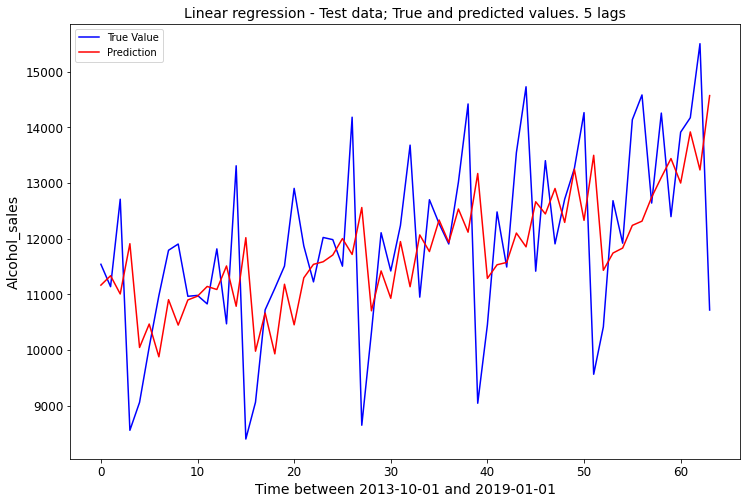

In [18]:
# Plot true values and the predicted values 
plt.figure(figsize=(12,8), facecolor='w')
plt.plot(y_test,color='b', label = 'True Value')
#ax.legend(['First line', 'Second line'])
plt.plot(pred_test_lr, color='r', label = 'Prediction')
plt.title('Linear regression - Test data; True and predicted values. 5 lags', fontsize = 14)
plt.xlabel('Time between 2013-10-01 and 2019-01-01', fontsize=14)
plt.ylabel('Alcohol_sales', fontsize=14)
plt.tick_params(axis='both', labelsize=12)
plt.legend(loc="upper left")
plt.show()

In [19]:
def run_model(model, X_train, X_test, y_train, y_test, model_name):
    """Run model, evaluate performance and plot test results"""
    
    # Fit model
    model.fit(X_train, y_train)
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    # Evaluate model
    rmse_train, mae_train = model_evaluation(y_train, pred_train)
    rmse_test, mae_test = model_evaluation(y_test, pred_test)

    print('Train data')
    print(model_name + ' model RMSE: ', rmse_train) # RMSE
    print(model_name + ' model MAE: ', mae_train)  # MAE


    print('\n')
    print('Test data')
    print(model_name + ' model RMSE: ', rmse_test) 
    print(model_name + ' model MAE: ', mae_test)
    
    # Plot results
    plt.figure(figsize=(12,8), facecolor='w')
    plt.plot(y_test, color='b', label = 'True Value')
    plt.plot(pred_test, color='r', label = 'Prediction')
    plt.title(model_name + ' - Test data; True and predicted values. 5 lags', fontsize = 14)
    plt.xlabel('Time between 2013-10-01 and 2019-01-01', fontsize=14)
    plt.ylabel('Alcohol_sales', fontsize=14)
    plt.tick_params(axis='both', labelsize=12)
    plt.legend(loc="upper left")
    plt.show()
    
    return model, rmse_train, mae_train, rmse_test, mae_test
    

Train data
Random Forest Regressor model RMSE:  335.2908038157884
Random Forest Regressor model MAE:  241.642578125


Test data
Random Forest Regressor model RMSE:  2285.993750513658
Random Forest Regressor model MAE:  1899.6174999999998


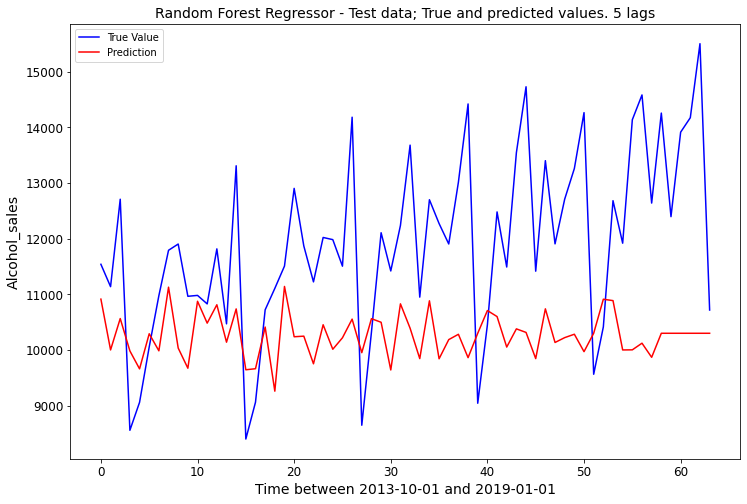

In [20]:
model_rf_def = RandomForestRegressor()
rf_name = 'Random Forest Regressor'
rf_model, rf_rmse_train, rf_mae_train, rf_rmse_test, rf_mae_test = run_model(model_rf_def, X_train, X_test, y_train, y_test, rf_name)